作业13
• 假设一颗大质量的恒星为40,000 K的O型星，其热光度为太阳的10万倍，假设周围是中性星际气体（全部为氢原子，$n \sim 10cm^{-3}$)均匀分布，
其在10000年内能电离的球形空间的半径为多大？

In [6]:
import numpy as np
#O型星的光度L=10^5Lsun
L = 10e5 * 3.828 * 1e26 #单位：W
#电离氢所需的光子能量为13.6eV
E = 13.6 * 1.602 * 1e-19 #单位：J
#每秒电离的氢原子数
N = L/E #单位：photons/s
#10000年内电离的氢原子数
N_total = N * 10000 * 365 * 24 * 3600
#电离的氢气体积
n = 1e6 # 单位：m^3
#N_total = n * 4/3 * np.pi * r**3
r = (N_total / n / 4 * 3 / np.pi)**(1/3.)
r = r/(9.461*1e15) #单位：光年
print(r) #单位：光年

249.9726301232052


#量级估计good
#更好的是计算大于13.6ev的光子数

请对银河系中的各种物质成分的质量比进行估算

银河系中的物质：

暗物质：$1e12M_{sun}$

恒星：$6e10M_{sun}$

星际介质（尘埃和气体）：$1.02e10M_{sun}$

中央黑洞：$4.1e6M_{sun}$

恒星遗迹：$1e9M_{sun}$

行星、卫星和其他天体：$1e9M_{sun}$

质量比为：100:6:1:0.0000041:0.000001:0.000001

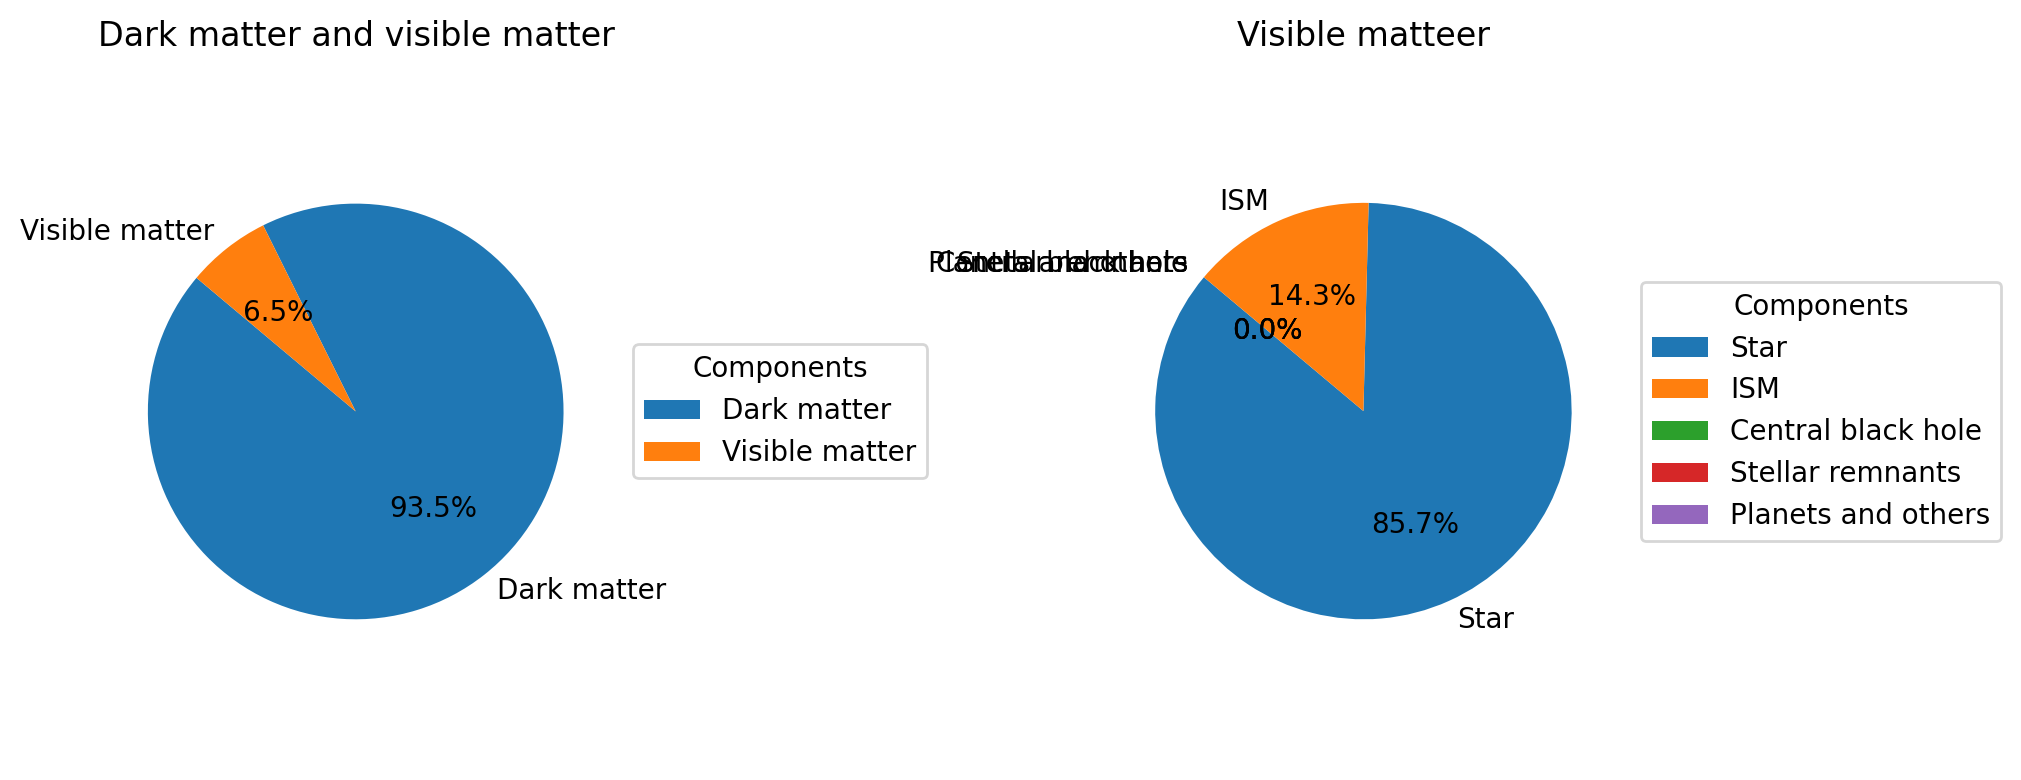

In [16]:
import matplotlib.pyplot as plt

# 定义成分和质量比
labels = ['Dark matter', 'Visible matter']
sizes = [100, 6+1+0.0000041+0.000001+0.000001]  # 质量比
# sizes = [size * 10**2 for size in sizes]  

# 绘制饼状图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=200)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('Dark matter and visible matter')
ax1.axis('equal')  
ax1.legend(labels, title="Components", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


labels = [ 'Star', 'ISM', 'Central black hole', 'Stellar remnants', 'Planets and others']
sizes = [6, 1, 0.0000041, 0.000001, 0.000001]  # 质量比
# sizes = [size * 10**5 for size in sizes]  

# 绘制饼状图
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax2.set_title('Visible matteer')
ax2.axis('equal')  
ax2.legend(labels, title="Components", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()


作业15 下载一个LAMOST或者SDSS观测到的星系光谱文件，画出相应光
谱，测量至少一个Lick指数特征及其误差，并在图中标注

Filename: spec-55859-F5902_sp01-146.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   ()      
  1  COADD         1 BinTableHDU     30   1R x 6C   [3908E, 3908E, 3908E, 3908E, 3908E, 3908E]   


/Users/katerina/opt/anaconda3/envs/py3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)


Text(0, 0.5, 'Flux')

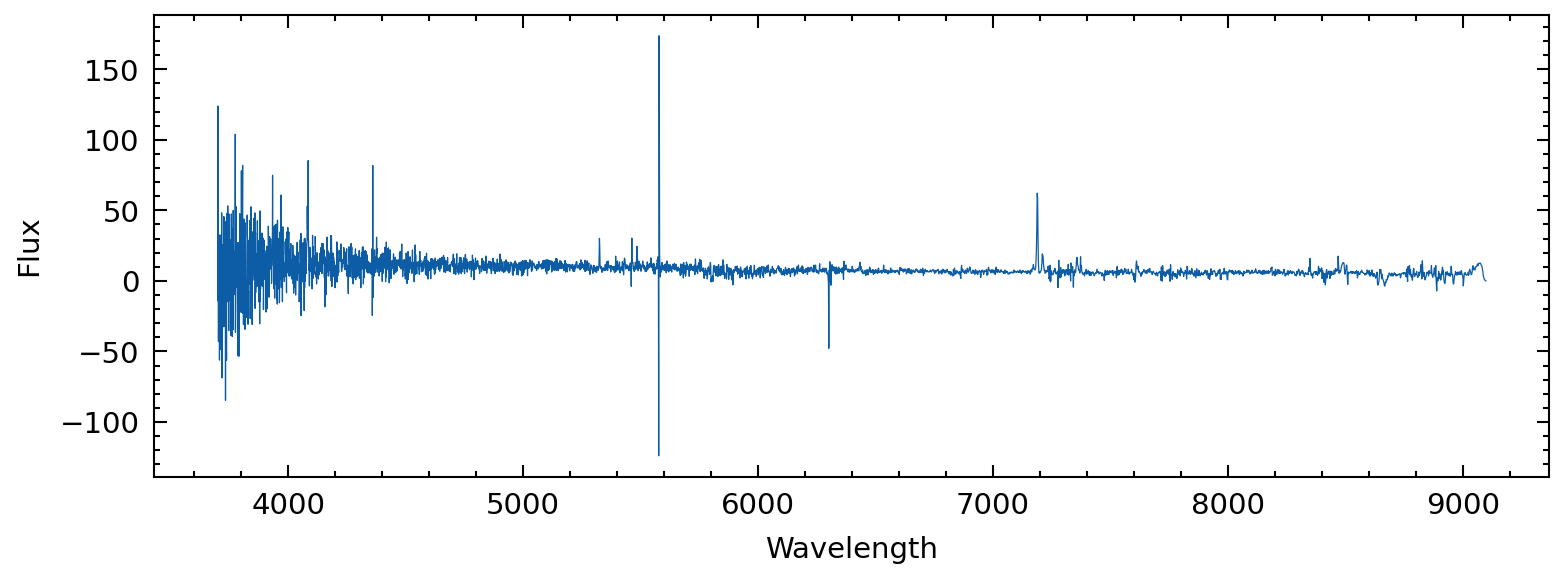

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
plt.style.use(['science','nature','no-latex'])
im = fits.open('spec-55859-F5902_sp01-146.fits.gz')
im.info()
spec = im[1].data

plt.figure(figsize=(6,2),dpi=300)
plt.plot(spec["WAVELENGTH"][0], spec["FLUX"][0], lw=0.3)
plt.xlabel('Wavelength')
plt.ylabel('Flux')


No handles with labels found to put in legend.


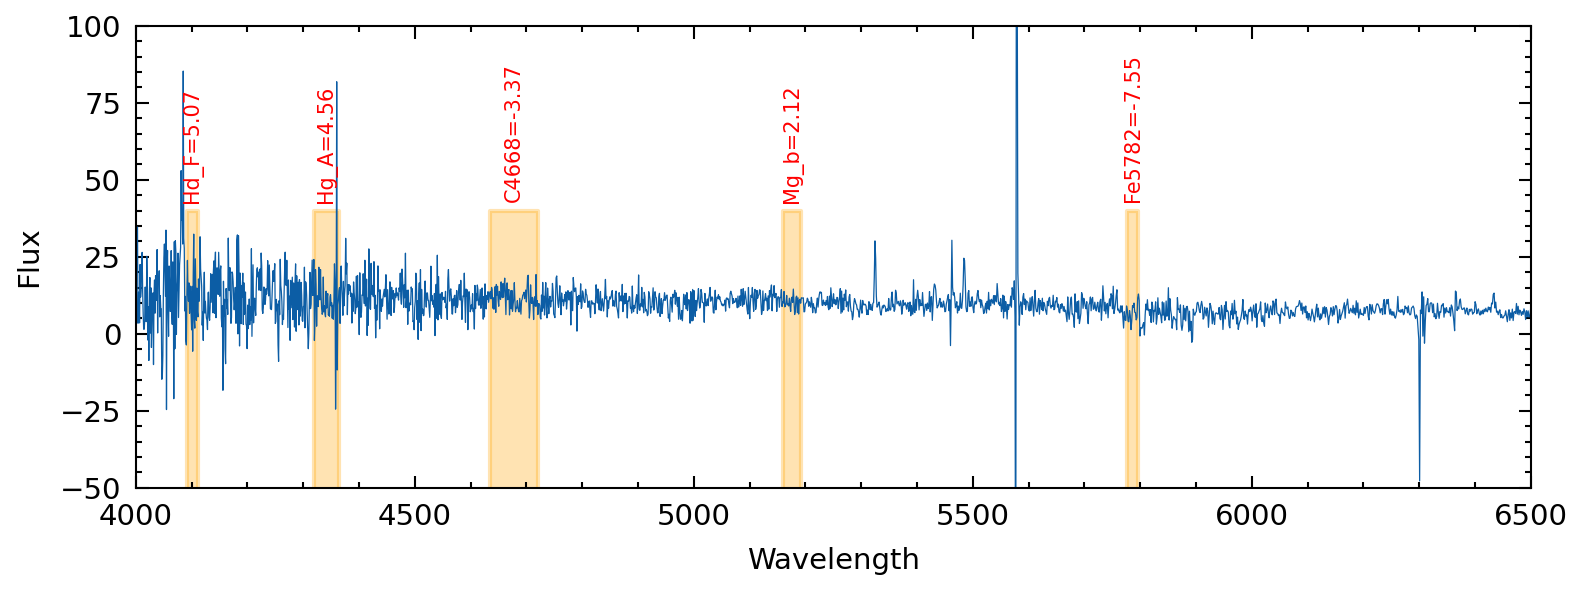

In [19]:
import sys
import os
sys.path.append("/Users/katerina/created/doctorate/星系天文学-shen/作业/lick/lick/")
import numpy as np
from lick import Lick
wavelength = spec['WAVELENGTH'][0]
flux = spec['FLUX'][0]

bands_file = "bands.txt"
bands_data = np.loadtxt(bands_file, dtype={'names': ('Index', 'sigma', 'blue_start', 'blue_end', 'band_start', 'band_end', 'red_start', 'red_end', 'type', 'units', 'error'),
                                           'formats': ('U10', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'i4', 'U4', 'f4')})


lick = Lick(wavelength, flux, np.column_stack((bands_data['blue_start'], bands_data['blue_end'],
                                               bands_data['band_start'], bands_data['band_end'],
                                               bands_data['red_start'], bands_data['red_end'])))
lick.classic_integration()
indices = lick.classic


plt.figure(figsize=(6,2), dpi=300)
plt.plot(spec["WAVELENGTH"][0], spec["FLUX"][0], lw=0.3)

for i in range(1, len(bands_data['Index']), 5):
    plt.fill_betweenx([np.min(flux), 40], bands_data['band_start'][i], bands_data['band_end'][i], color='orange', alpha=0.3)
    plt.text((bands_data['band_start'][i]+bands_data['band_end'][i])/2., 40+4, bands_data['Index'][i]+'='+str(np.round(indices[i],2)),fontsize=5, ha='center', color='r',rotation=90)
    
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.xlim(4000, 6500)
plt.ylim(-50,100)
plt.legend()
plt.show()


SDSS的光谱分辨率是~2000，某星系其连续谱单位波长的典型信
噪比为5，该星系Ha线的等值宽度为50A，请问其Ha线流量的信噪
比是多少？

In [21]:
R = 2000
lambda_Halpha = 6563 
delta_lambda = lambda_Halpha/R
EW = 50
S_N = EW/delta_lambda
print('S/N:', S_N)

S/N: 15.236934328813044


利用GEHONG生成一个积分视场光谱，并进行简单的可视化（选
做）

In [2]:
from gehong import spec1d as s
from gehong import map2d as m
from gehong import cube3d as b
from gehong import config as c
import numpy as np
import matplotlib.pyplot as plt

In [3]:
config = c.config()
from astropy.io import fits
hdulist = fits.open('TNG_Example.fits')
print(hdulist.info())
# 恒星星族相关Map
stellar_sbmap    = m.Map2d(config)
stellar_sbmap.load_map(hdulist[1].data)
stellar_agemap   = m.Map2d(config)
stellar_agemap.load_map(np.log10(hdulist[2].data*1e9))
stellar_fehmap   = m.Map2d(config)
stellar_fehmap.load_map(hdulist[3].data)
stellar_velmap   = m.Map2d(config)
stellar_velmap.load_map(hdulist[4].data)
stellar_vdispmap = m.Map2d(config)
stellar_vdispmap.load_map(hdulist[5].data)
# 气体相关Map
gas_hamap    = m.Map2d(config)
gas_hamap.load_map(hdulist[6].data)
gas_zhmap    = m.Map2d(config)
gas_zhmap.load_map(hdulist[7].data)
gas_velmap   = m.Map2d(config)
gas_velmap.load_map(hdulist[8].data)
gas_vdispmap = m.Map2d(config)
gas_vdispmap.load_map(hdulist[9].data)
# 假设一个尘埃消光分布
ebvmap = m.Map2d(config)
ebvmap.load_map(hdulist[5].data * 0 + 0.1)

stellarcontinuum = m.StellarPopulationMap(config, sbright = stellar_sbmap, 
                                          logage = stellar_agemap, feh = stellar_fehmap, 
                                          vel = stellar_velmap, vdisp = stellar_vdispmap, 
                                          ebv = ebvmap)
ionizedgas = m.IonizedGasMap(config, halpha = gas_hamap, 
                             zh = gas_zhmap, vel = gas_velmap, 
                             vdisp = gas_vdispmap, ebv = ebvmap)

Filename: TNG_Example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SURFACE_BRIGHT    1 ImageHDU         8   (30, 30)   float64   
  2  AGE_STAR      1 ImageHDU         8   (30, 30)   float64   
  3  FEH_STAR      1 ImageHDU         8   (30, 30)   float64   
  4  VEL_STAR      1 ImageHDU         8   (30, 30)   float64   
  5  SIG_STAR      1 ImageHDU         8   (30, 30)   float64   
  6  HA_FLUX       1 ImageHDU         8   (30, 30)   float64   
  7  ZH_GAS        1 ImageHDU         8   (30, 30)   float64   
  8  VEL_GAS       1 ImageHDU         8   (30, 30)   float64   
  9  SIG_GAS       1 ImageHDU         8   (30, 30)   float64   


None


In [5]:
u = b.Cube3D(config, stellar_map = stellarcontinuum, gas_map = ionizedgas)
gas_tem = s.EmissionLineTemplate(config, model = 'hii')
stellar_tem = s.StellarContinuumTemplate(config)
u.make_cube(stellar_tem = stellar_tem, hii_tem = gas_tem)


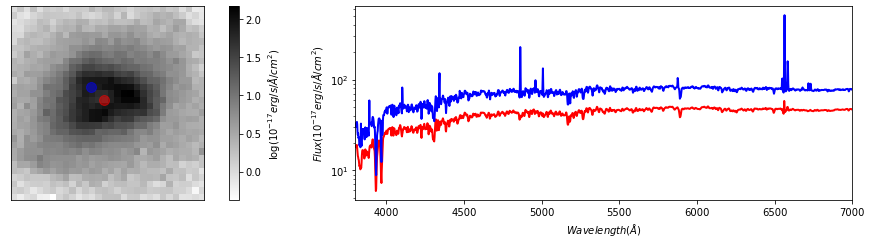

In [6]:
x1, y1 = 14, 14
x2, y2 = 12, 12

plt.figure(figsize=(15,3.5))
plt.subplot(121)
plt.imshow(np.log10(np.mean(u.flux[:,:,(u.wave>4900)&(u.wave<5100)],axis=2)),cmap='gray_r')
plt.colorbar(label=r'$\log (10^{-17} erg/s/\AA/cm^2)$')
plt.scatter(x1,y1,marker='o',s=100,color='red',alpha=0.5)
plt.scatter(x2,y2,marker='o',s=100,color='blue',alpha=0.5)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
idx=(u.wave>3800)&(u.wave<7000)
plt.plot(u.wave[idx],u.flux[x1,y1,:][idx],lw=2,color='red')
plt.plot(u.wave[idx],u.flux[x2,y2,:][idx],lw=2,color='blue')
plt.xlim(3800,7000)
plt.yscale('log')
plt.xlabel(r'$Wavelength(\AA)$')
plt.ylabel(r'$Flux (10^{-17} erg/s/\AA/cm^2)$')

plt.tight_layout()
plt.show()

## good